## California Housing Price Prediction .

## 1.Importing required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Read the dataset
housing = pd.read_csv("housing.csv")
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


## 2. Perform Exploratory Data Analysis

In [23]:
housing.shape

# describe function gives a summary like mean, quartiles, median, std, count, etc for the numeric columns
housing.describe()

# %% [code]
# info functions helps us to understand the data type of all the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
# lets check if there are missing values in the data
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## As we can see only ``total_bedrooms`` column has 207 NAN values, lets treat it.
#### There are 2 ways to treat NAN

#### 1. We can delete those records which are missing (Not Recommended)
#### 2. or we can fill those columns using the mean or median - which in this case is a pretty much easier.
## *But what should we be using ``Mean`` or ``Median``*
#### So to decide this we need to first check the outliers.


Text(0, 0.5, 'Frequency')

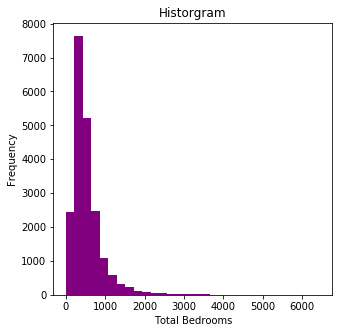

In [25]:
plt.figure(figsize=(5,5))
plt.hist(housing[housing["total_bedrooms"].notnull()]["total_bedrooms"],bins=30,color="purple")
#histogram of totalbedrooms
#data has some outliers..??
(housing["total_bedrooms"]>4000).sum()
plt.title("Historgram")
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")

# We can clearly see there are some outliers in the column, but let check with the help of box plot once more

In [26]:
# (housing["total_bedrooms"]>4000).sum()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

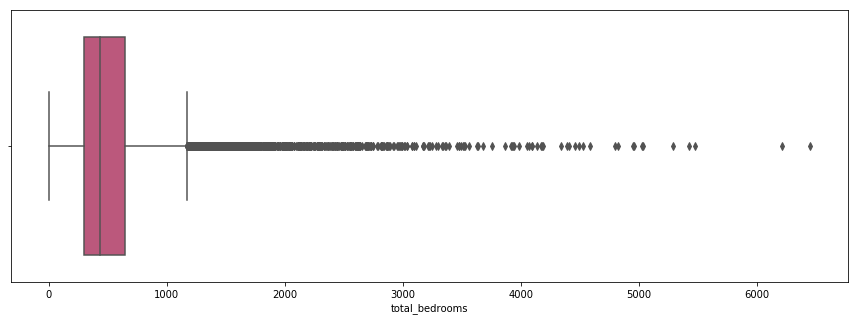

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(y="total_bedrooms",data=housing, orient="h", palette="plasma")
plt.plot

#As we can see there are a lot of outliers, so to fill them we should be using ``Median`` instead of ``Mean``, 
# as the mean would vary a lot because of outliers and can affect the accuracy of our model

In [28]:
# Fill missing values
housing['total_bedrooms'] = housing['total_bedrooms'].fillna((housing['total_bedrooms'].median()))

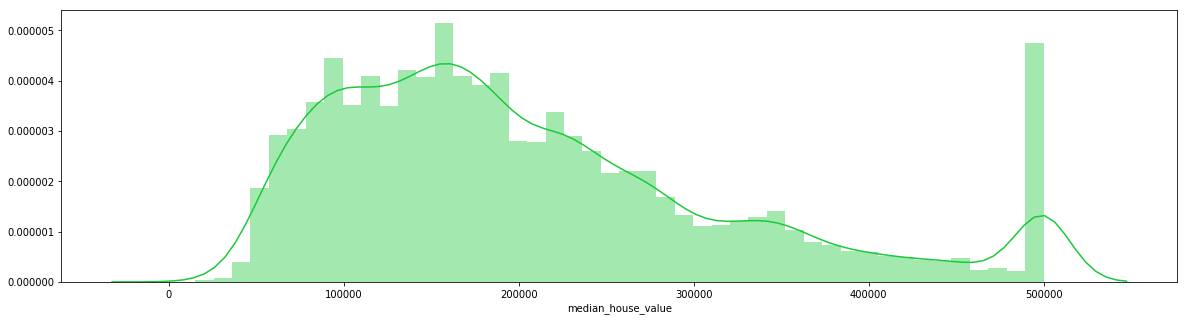

In [29]:
# Lets plot and see what our dependent variable ie; "Y" column - ("median house price") looks like
# Histogram would be the best way to do it

plt.figure(figsize=(20,5))
sns.set_color_codes(palette="bright")
sns.distplot(housing['median_house_value'],color='g')

# We can see there is sudden increase in the median house value at >= 5,00,000, 
# & this could be outliers. We should definately be removing them.

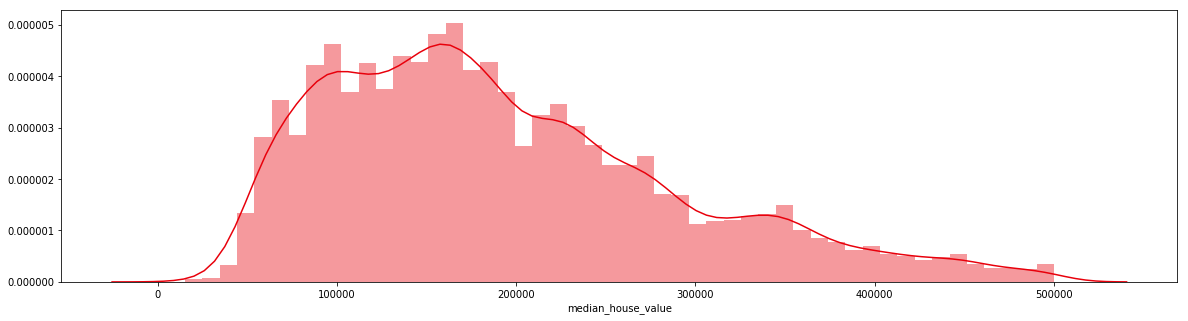

In [30]:
housing[housing["median_house_value"]>300000]["median_house_value"].value_counts().head(10)
housing = housing.loc[housing["median_house_value"]<500001,:]
plt.figure(figsize=(20,5))
sns.set_color_codes(palette="bright")
sns.distplot(housing["median_house_value"], color="r")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160B4ED6C50>,
      dtype=object)

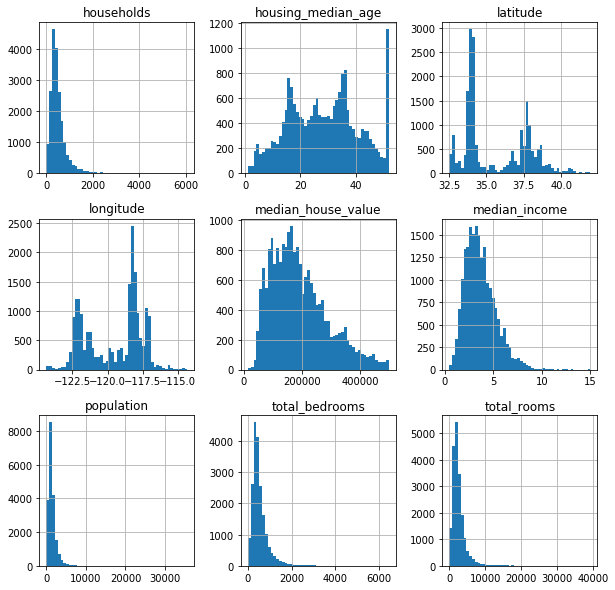

In [31]:
#The bins parameter is used to customize the number of bins shown on the plots.
housing.hist(bins=50,figsize=(10,10))

Text(0.5, 1.0, 'House price based of geographical co-ordinates')

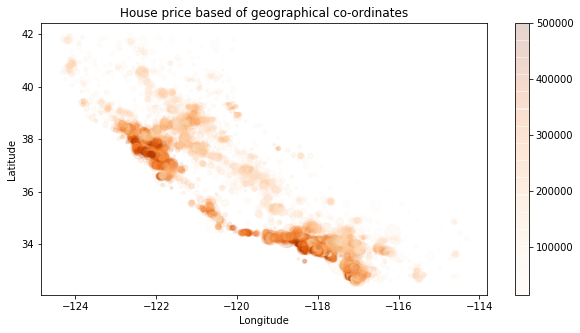

In [32]:
# Since we have some geographical data, lets see if get some meaning insights from it..

plt.figure(figsize=(10,5))
plt.scatter(housing["longitude"],housing["latitude"],c=housing["median_house_value"],
            s=housing["population"]/50, alpha=0.1, cmap="Oranges")
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House price based of geographical co-ordinates")

# We can see there are some high density areas in california, so we can say the price of house is a bit realted to
# location as well. 

# Earlier when I saw the data, I thought longitude & latitude would not be weak predictors
# but after plotting this, we can conclude even they are useful features.``
# So never judge it by visually seeing the data just in the first time.

In [33]:
# Before we split our data, we can also see that the feature - total_rooms has no significance, as this talks 
# about the rooms in the entire district. 
# Instead, we should find out, how many rooms are there in individual household, that would be more informative
# for our analysis...

housing["rooms_household"] = housing.total_rooms / housing.households

# now we can remove this feature
housing.drop("total_rooms", axis=1, inplace=True)


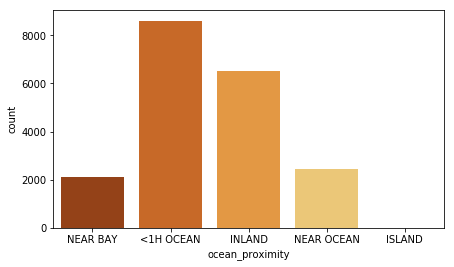

In [34]:
# We have one categorical column ("Ocean Proximity") in the data set, lets see if we should keep this column or remove it

# Barplot of categorical column
plt.figure(figsize=(7,4))
sns.countplot(data=housing,x='ocean_proximity', palette = "YlOrBr_r")

# It is very definate we should be keeping this feautre, but since this is a categorical feature, we should perform 
# preprocessing on it to convert it into numerical data.


## 3. Performing Linear Regression


In [38]:
# to conviently split the data into x & y part, I am rearranging the output column and bring it in the last

housing=housing[["longitude", "latitude", "housing_median_age", "total_bedrooms", "population", 
                 "households", "median_income", "ocean_proximity", "rooms_household", "median_house_value"]]
housing.head(5)

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,ocean_proximity,rooms_household,median_house_value
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,452600.0
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,358500.0
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,352100.0
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,341300.0
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,342200.0


In [43]:
import gc
gc.collect()

134

In [39]:
# Spliting the data
x = housing.iloc[:,0:9].values
y = housing.iloc[:,9].values

In [40]:
# Converting Categorical attribute to numeric

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encode_x = LabelEncoder()
x[:, 7] = label_encode_x.fit_transform(x[:, 7])

onehot = OneHotEncoder(categories="auto")
x = onehot.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
# Spliting the train & test data set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

MemoryError: 

In [ ]:
# Feature Scaling /  Normalization

from sklearn.preprocessing import StandardScaler
scale  = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

In [ ]:
model for future prediction
y_pred = lin_reg.predict(x_test)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
score = lin_reg.score(x_test, y_test)

# Output of score = 0.6524213016981026


In [ ]:
# Plot Actual vs. Predicted

test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:80])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',color="grey")

#### Some memory issues with the kernel, that is why I have written the rest of the codes in comments, you can try at your end I am sure it would work.

### Thank you all for understanding & reading...
 
#### If you found this helpful an upvote would be really appreciated...